In [37]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
class my_KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Неподдерживаемый критерий. Выберите 'euclidean' или 'manhattan'.")

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self._distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [7]:
if __name__ == "__main__":
    X_train = np.array([[1, 3], [2, 4], [3, 7], [5, 11], [6, 8], [9, 16]])
    y_train = np.array([1, 0, 0, 0, 1, 1])
    X_test = np.array([[0, 1], [3, 7], [11, 13]])

    knn_e = my_KNN(k=3, distance_metric='manhattan')
    knn_e.fit(X_train, y_train)

    knn_m = my_KNN(k=3, distance_metric='euclidean')
    knn_m.fit(X_train, y_train)

    predictions_e = knn_e.predict(X_test)
    predictions_m = knn_e.predict(X_test)

    print("Предсказанные классы Евклидово: ", predictions_e)
    print("Предсказанные классы Манхэттенское: ", predictions_m)

Предсказанные классы Евклидово:  [0 0 1]
Предсказанные классы Манхэттенское:  [0 0 1]


In [29]:
file_path = 'heart.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  )

In [31]:
duplicates = data.duplicated().sum()

summary_stats = data.describe()

duplicates, summary_stats

(723,
                age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000   
 25%      48.000000     0.000000     0.000000   120.000000   211.00000   
 50%      56.000000     1.000000     1.000000   130.000000   240.00000   
 75%      61.000000     1.000000     2.000000   140.000000   275.00000   
 max      77.000000     1.000000     3.000000   200.000000   564.00000   
 
                fbs      restecg      thalach        exang      oldpeak  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
 mean      0.149268     0.529756   149.114146     0.336585     1.071512   
 std       0.356527     0.527878    23.005724     0.472772     1.175053   
 min       0.000000     0.

In [33]:
data_cleaned = data.drop_duplicates()

data_cleaned_shape = data_cleaned.shape

outlier_checks = data_cleaned[['chol', 'oldpeak']].describe()

data_cleaned_shape, outlier_checks

((302, 14),
              chol     oldpeak
 count  302.000000  302.000000
 mean   246.500000    1.043046
 std     51.753489    1.161452
 min    126.000000    0.000000
 25%    211.000000    0.000000
 50%    240.500000    0.800000
 75%    274.750000    1.600000
 max    564.000000    6.200000)

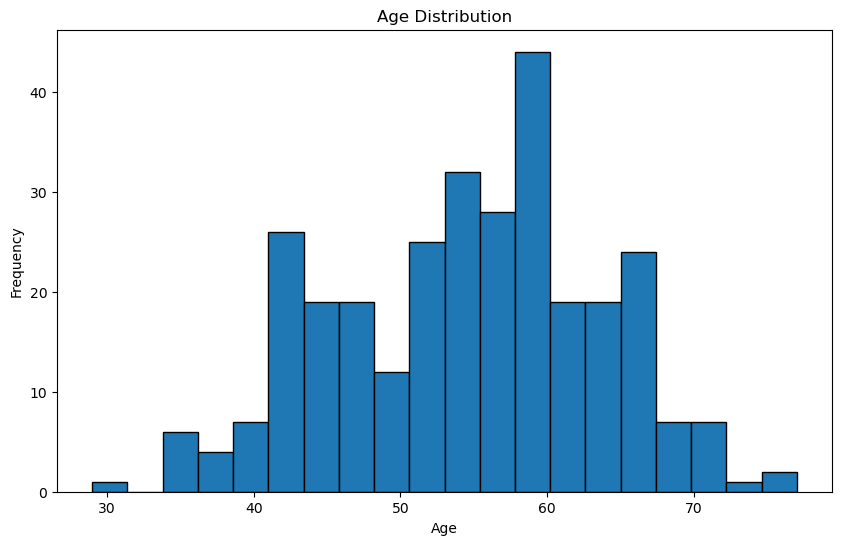

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

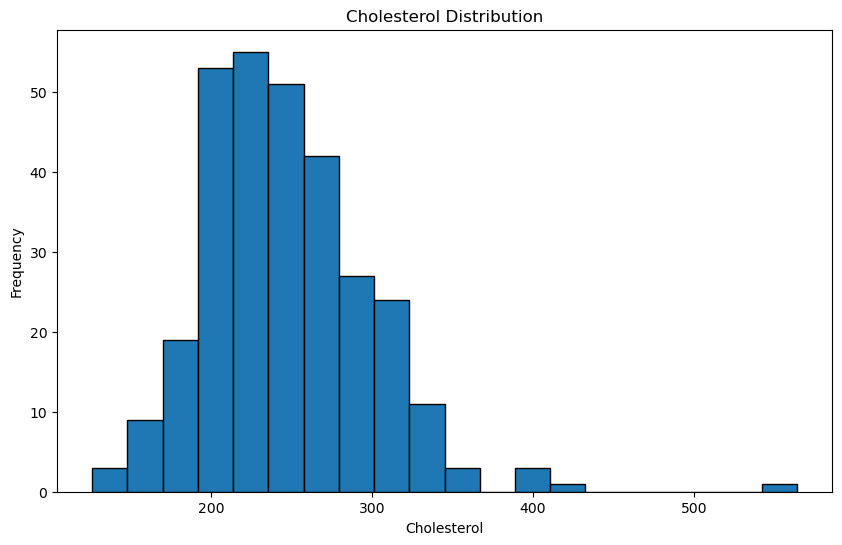

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['chol'], bins=20, edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

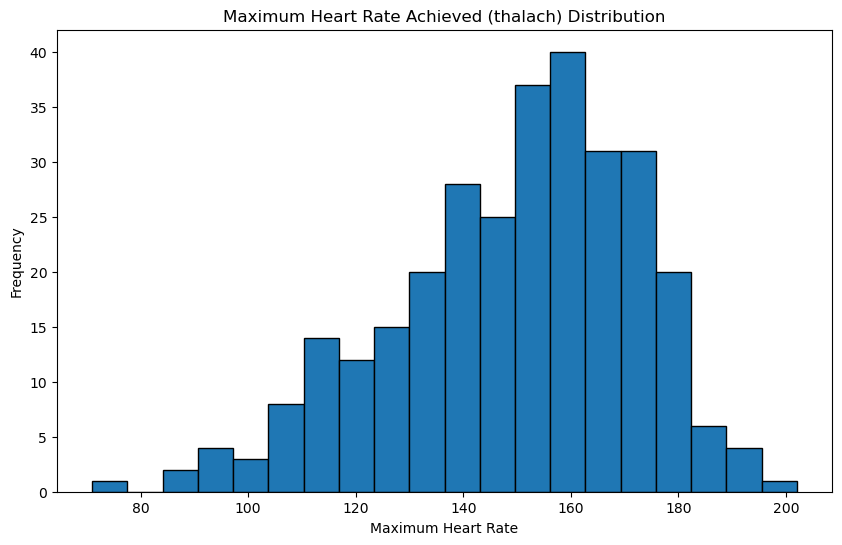

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['thalach'], bins=20, edgecolor='black')
plt.title('Maximum Heart Rate Achieved (thalach) Distribution')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

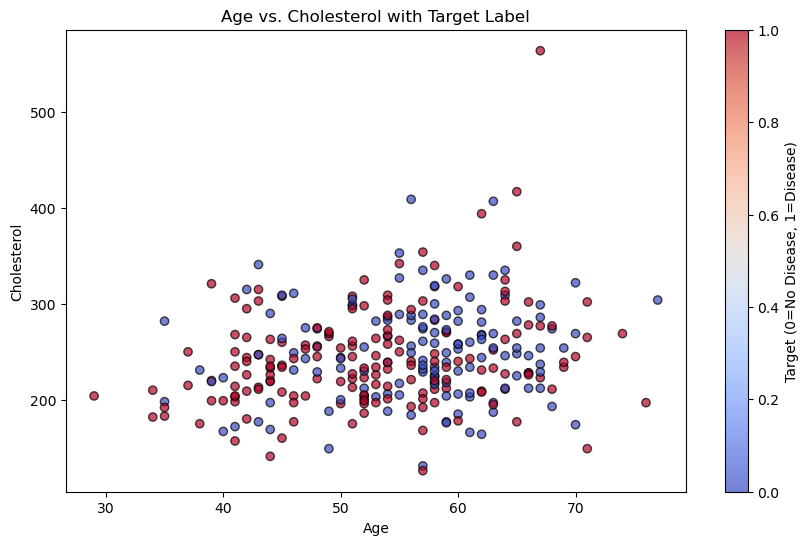

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['age'], data_cleaned['chol'], c=data_cleaned['target'], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Target (0=No Disease, 1=Disease)')
plt.title('Age vs. Cholesterol with Target Label')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

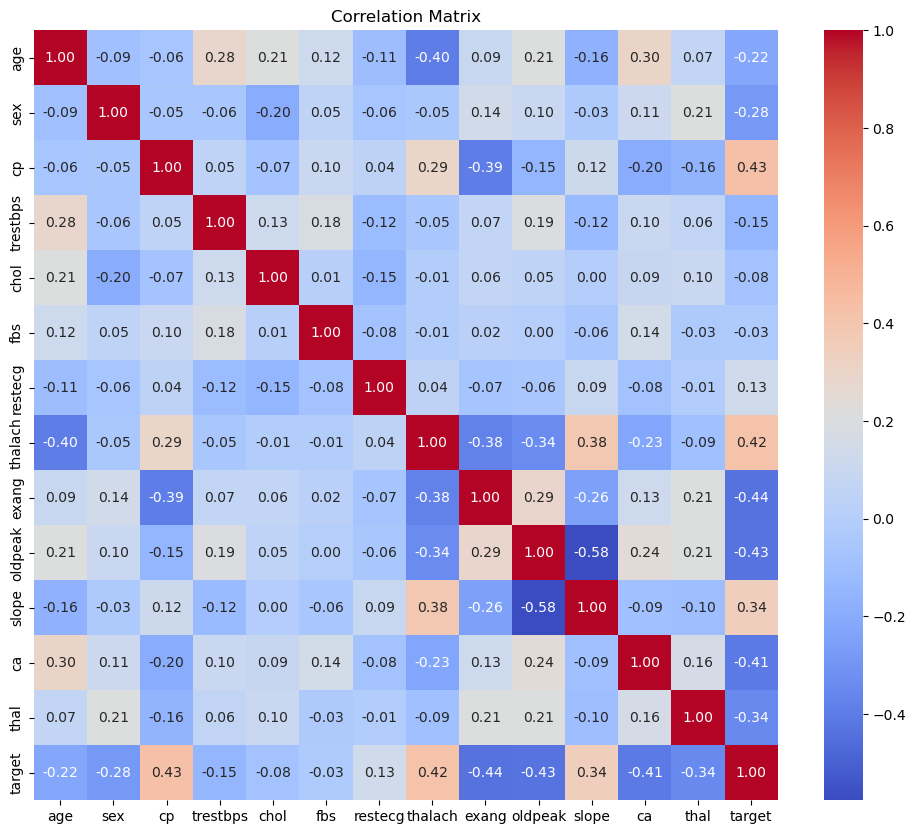

In [47]:
plt.figure(figsize=(12, 10))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [49]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data_transformed = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

data_transformed_shape = data_transformed.shape
data_transformed_head = data_transformed.head()

data_transformed_shape, data_transformed_head

((302, 23),
    age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
 0   52       125   212      168      1.0       0   True  False  False  False   
 1   53       140   203      155      3.1       0   True  False  False  False   
 2   70       145   174      125      2.6       0   True  False  False  False   
 3   61       148   203      161      0.0       0   True  False  False  False   
 4   62       138   294      106      1.9       0  False  False  False  False   
 
    ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
 0  ...    False    False     True  False   True  False  False   False   False   
 1  ...     True    False    False  False  False  False  False   False   False   
 2  ...     True    False    False  False  False  False  False   False   False   
 3  ...    False    False     True   True  False  False  False   False   False   
 4  ...    False     True    False  False  False   True  False   False    True   
 
    th

**Данные преобразованы:** категориальные признаки, такие как пол, тип боли в груди, уровень сахара, результаты ЭКГ и другие, были преобразованы в индикаторные переменные.Теперь таблица содержит 23 столбца, что расширяет количество признаков, подходящих для классификационной модели.

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [60]:
X = data_transformed.drop(columns=['target']).values
y = data_transformed['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'k': [3, 5, 7, 9, 11],
    'distance_metric': ['euclidean', 'manhattan']
}

def tune_knn(X_train, y_train, X_test, y_test, param_grid):
    best_score = 0
    best_params = {'k': None, 'distance_metric': None}
    
    for k in param_grid['k']:
        for metric in param_grid['distance_metric']:
            knn = my_KNN(k=k, distance_metric=metric)
            knn.fit(X_train, y_train)
            predictions = knn.predict(X_test)
            score = accuracy_score(y_test, predictions)
            
            if score > best_score:
                best_score = score
                best_params = {'k': k, 'distance_metric': metric}
    
    return best_score, best_params

In [62]:
best_score, best_params = tune_knn(X_train_scaled, y_train, X_test_scaled, y_test, param_grid)
best_score, best_params

(0.819672131147541, {'k': 3, 'distance_metric': 'manhattan'})

Лучший результат на тестовой выборке составил примерно ***81.97%*** точности. Наилучшие гиперпараметры для этой модели:
* ***k:*** 3
* ***Метрика расстояния:*** Манхэттенская

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [73]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

cv_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores.mean()

cv_scores

{'Logistic Regression': 0.8130102040816325,
 'Support Vector Machine': 0.8213435374149661,
 'K-NN': 0.8420918367346939,
 'Naive Bayes': 0.771513605442177,
 'Decision Tree': 0.6967687074829932}

Средние значения точности для каждой модели классификации при кросс-валидации:

* ***K-Nearest Neighbors:*** 84.21%
* ***Support Vector Machine:*** 82.13%
* ***Logistic Regression:*** 81.30%
* ***Naive Bayes:*** 77.15%
* ***Decision Tree:*** 69.68%
  
Лучший результат показала библиотечная версия ***K-Nearest Neighbors*** с точностью ***84.21%***. SVM и логистическая регрессия также дали высокие результаты, а деревья решений показали себя менее эффективно для этой задачи.

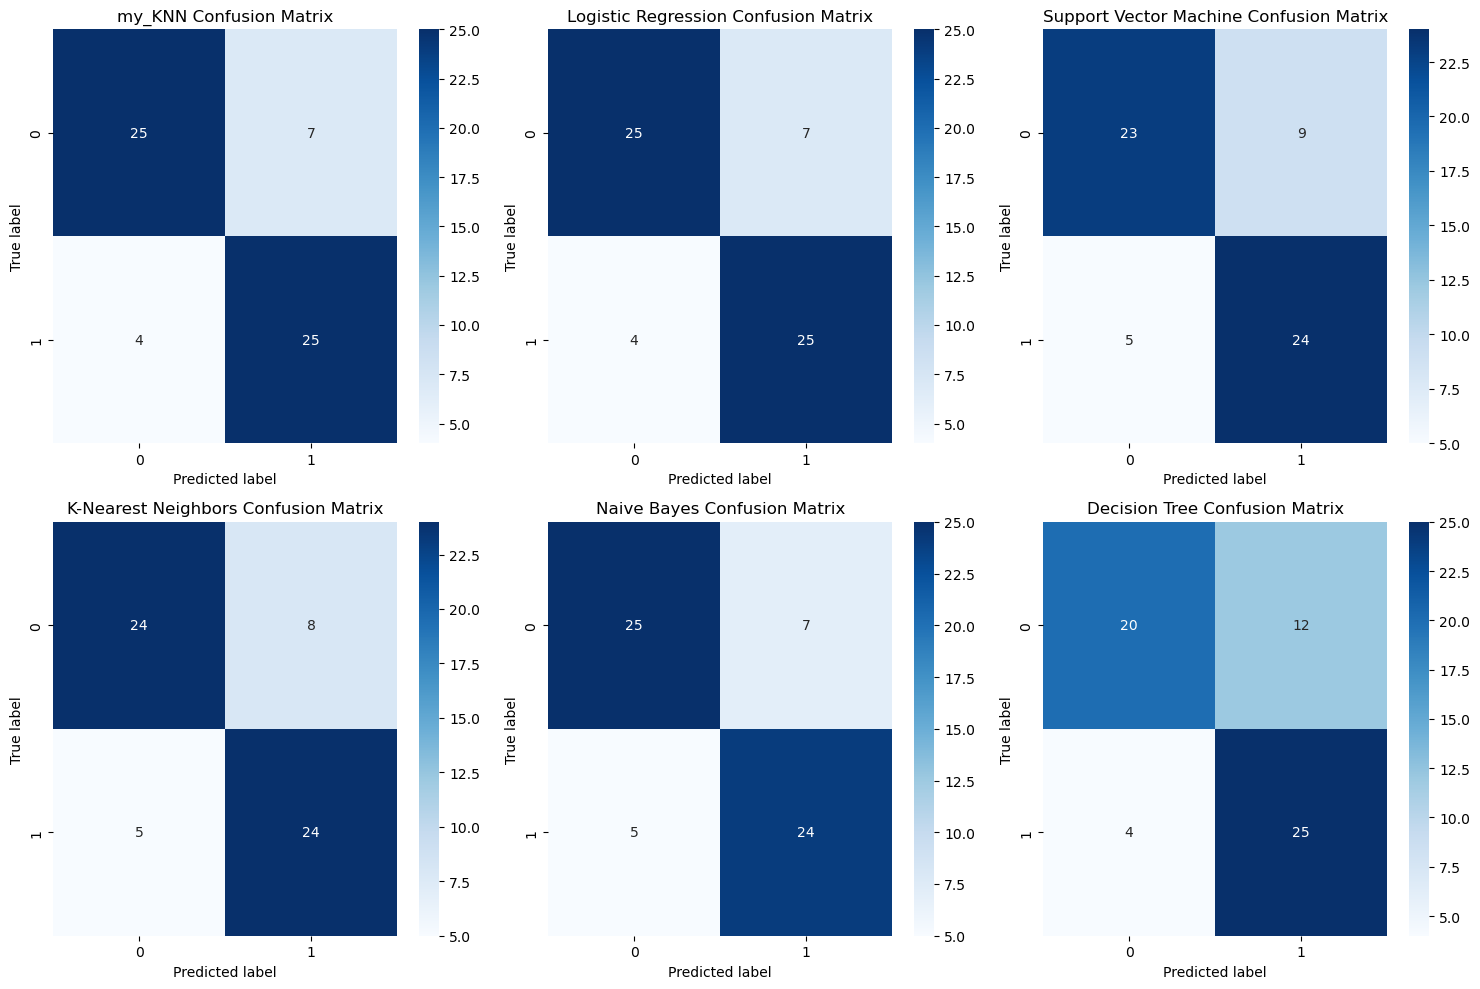

In [88]:
fitted_models = {
    "my_KNN": my_KNN(k=3, distance_metric='manhattan'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

predictions = {}
for model_name, model in fitted_models.items():
    model.fit(X_train_scaled, y_train)  
    predictions[model_name] = model.predict(X_test_scaled) if model_name != "my_KNN" else model.predict(X_test_scaled)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel() 

for idx, (model_name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

plt.tight_layout()
plt.show()

In [90]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [92]:
my_logistic = MyLogisticRegression(learning_rate=0.01, iterations=1000)
my_logistic.fit(X_train_scaled, y_train)

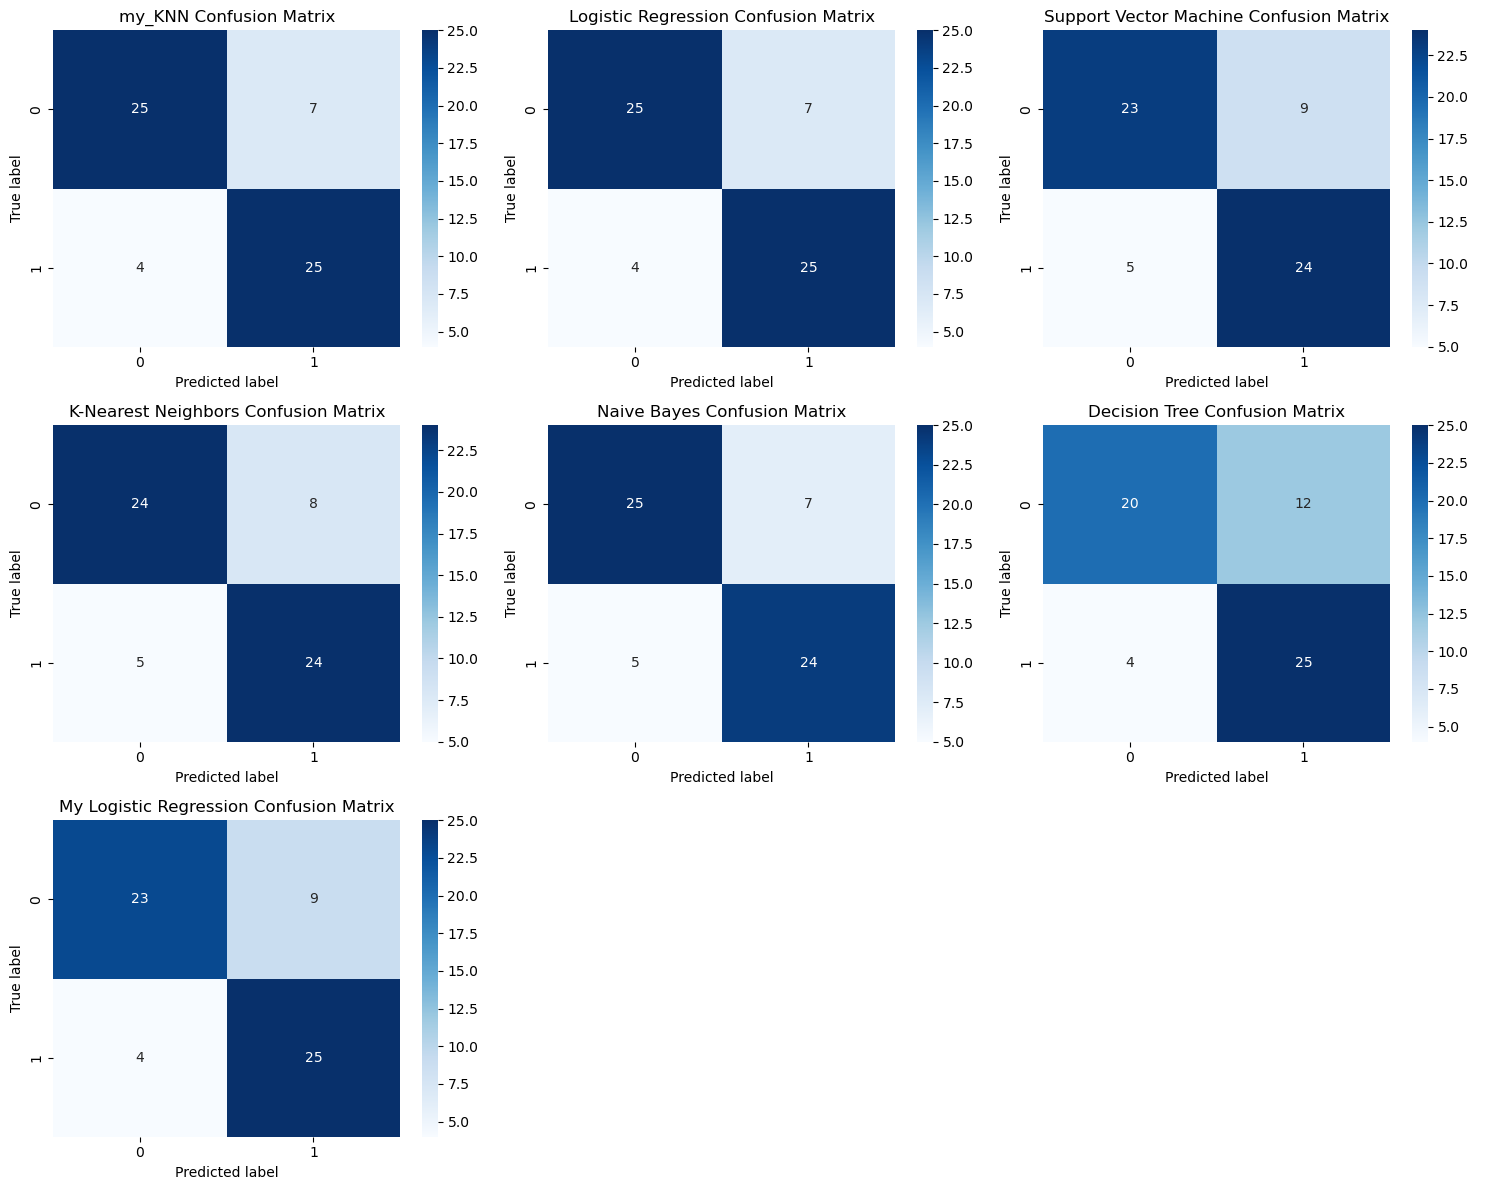

In [94]:
predictions["My Logistic Regression"] = my_logistic.predict(X_test_scaled)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

for i in range(len(predictions), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Данные Ирис**
***Iris.csv*** — это набор данных, содержащий информацию о характеристиках цветков ириса. Он включает пять столбцов: длину лепестка, ширину лепестка, длину чашелистика, ширину чашелистика и видовой тип

In [96]:
df = pd.read_csv('iris.csv')

df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepal.length  sepal.width  petal.length  petal.width variety
 0           5.1          3.5           1.4          0.2  Setosa
 1           4.9          3.0           1.4          0.2  Setosa
 2           4.7          3.2           1.3          0.2  Setosa
 3           4.6          3.1           1.5          0.2  Setosa
 4           5.0          3.6           1.4          0.2  Setosa)

In [112]:
non_numeric_entries = {}
for column in df.columns[:-1]:
    try:
        pd.to_numeric(df[column])
    except ValueError as e:
        non_numeric_entries[column] = str(e)

non_numeric_entries

{}

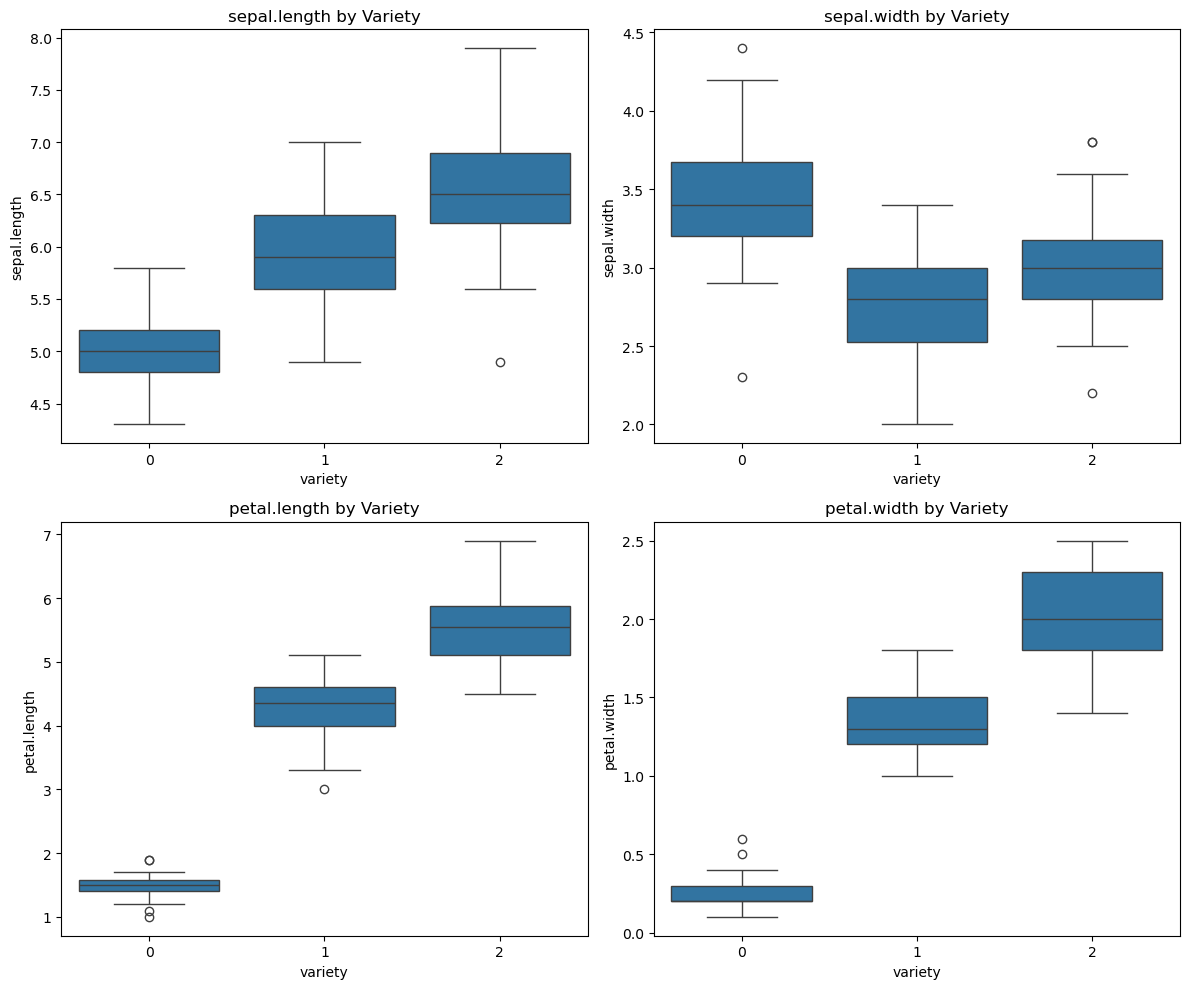

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

for idx, feature in enumerate(features):
    sns.boxplot(x='variety', y=feature, data=df, ax=axes[idx // 2][idx % 2])
    axes[idx // 2][idx % 2].set_title(f"{feature} by Variety")

plt.tight_layout()
plt.show()


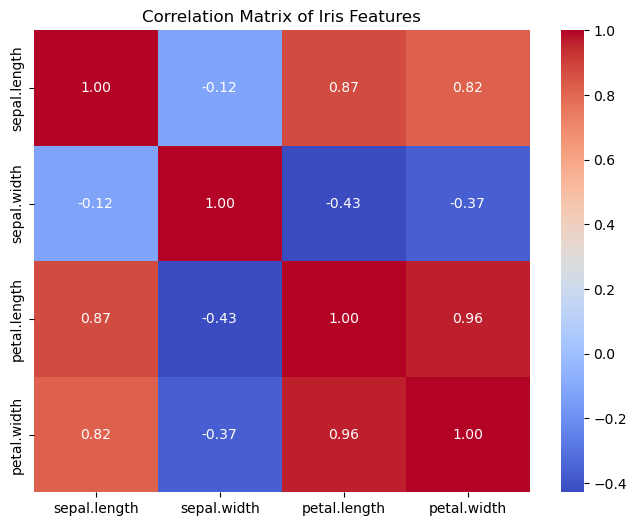

In [118]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [120]:
df['variety'] = df['variety'].astype('category').cat.codes

df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [122]:
X_iris = df.drop(columns=['variety']).values
y_iris = df['variety'].values

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

scaler_iris = StandardScaler()
X_train_scaled_iris = scaler_iris.fit_transform(X_train_iris)
X_test_scaled_iris = scaler_iris.transform(X_test_iris)

param_grid_knn = {
    'k': [3, 5, 7, 9],
    'distance_metric': ['euclidean', 'manhattan']
}

best_score_iris, best_params_iris = tune_knn(X_train_scaled_iris, y_train_iris, X_test_scaled_iris, y_test_iris, param_grid_knn)
best_score_iris, best_params_iris

(1.0, {'k': 3, 'distance_metric': 'euclidean'})

Лучший результат для модели ***my_KNN*** на тестовой выборке составил 100% точности. Оптимальные гиперпараметры для этой модели:
* ***k:*** 3
* ***Метрика расстояния:*** Евклидова

Эти параметры обеспечивают наивысшую точность, что делает модель идеально подходящей для данной задачи классификации на наборе данных об ирисах.

In [127]:
models_iris = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),  # Using k=3 as found optimal
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

cv_scores_iris = {}

for model_name, model in models_iris.items():
    scores = cross_val_score(model, X_train_scaled_iris, y_train_iris, cv=5, scoring='accuracy')
    cv_scores_iris[model_name] = scores.mean()

cv_scores_iris

{'Logistic Regression': 0.9583333333333334,
 'Support Vector Machine': 0.95,
 'K-Nearest Neighbors': 0.95,
 'Naive Bayes': 0.9416666666666668,
 'Decision Tree': 0.95}

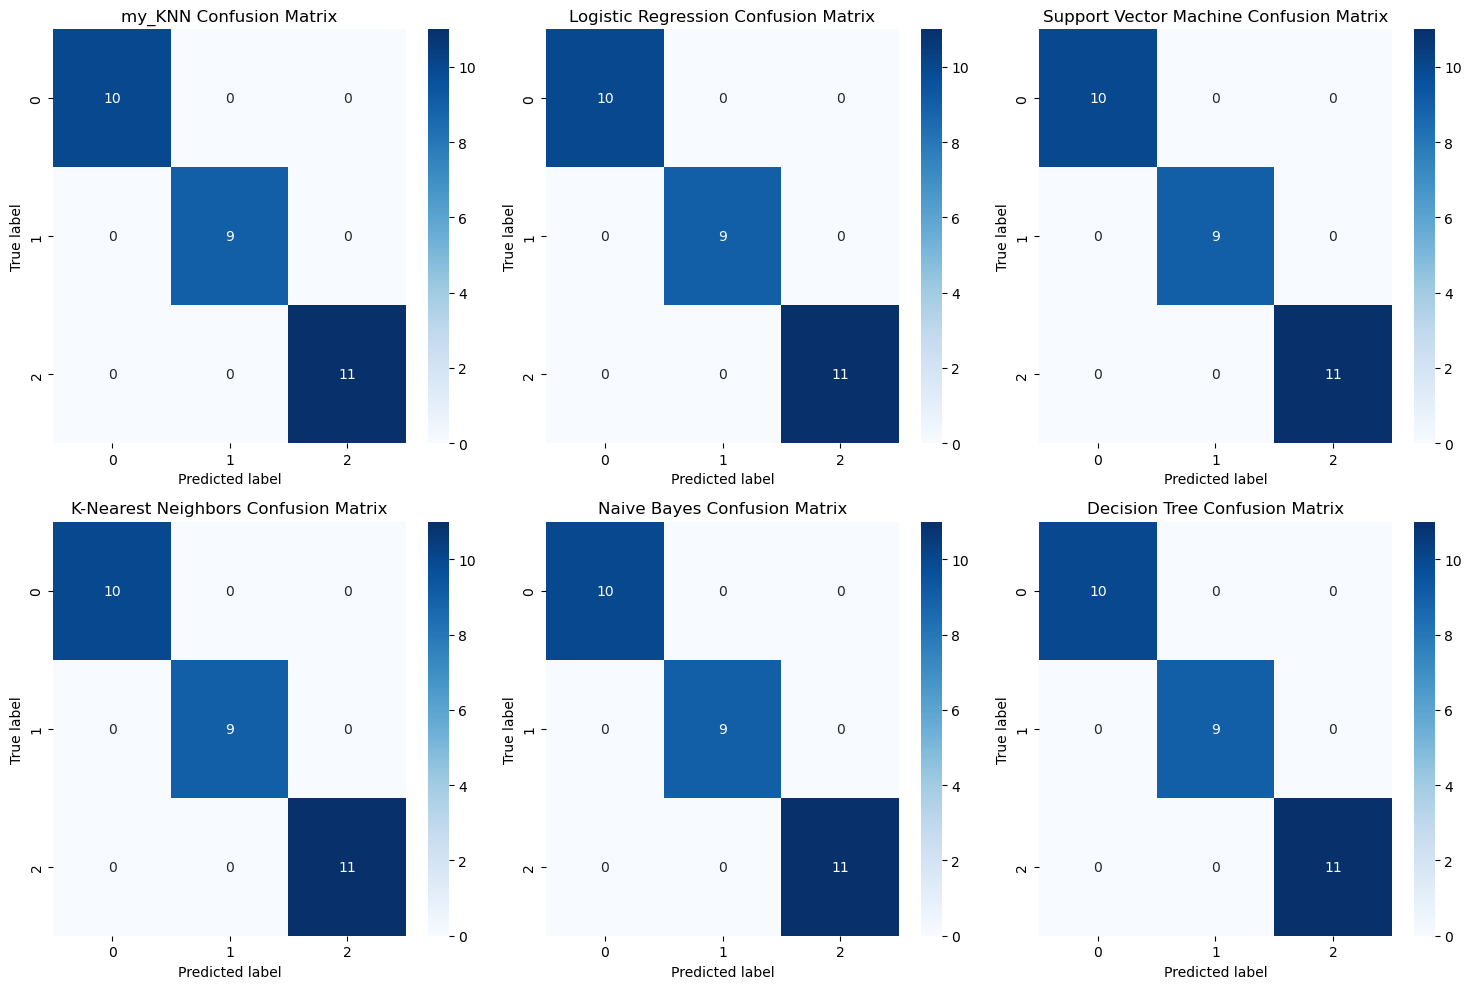

In [131]:
fitted_models_iris = {
    "my_KNN": my_KNN(k=3, distance_metric='euclidean'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

predictions_iris = {}

for model_name, model in fitted_models_iris.items():
    model.fit(X_train_scaled_iris, y_train_iris)
    predictions_iris[model_name] = model.predict(X_test_scaled_iris) if model_name != "my_KNN" else model.predict(X_test_scaled_iris)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions_iris.items()):
    cm = confusion_matrix(y_test_iris, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

plt.tight_layout()
plt.show()

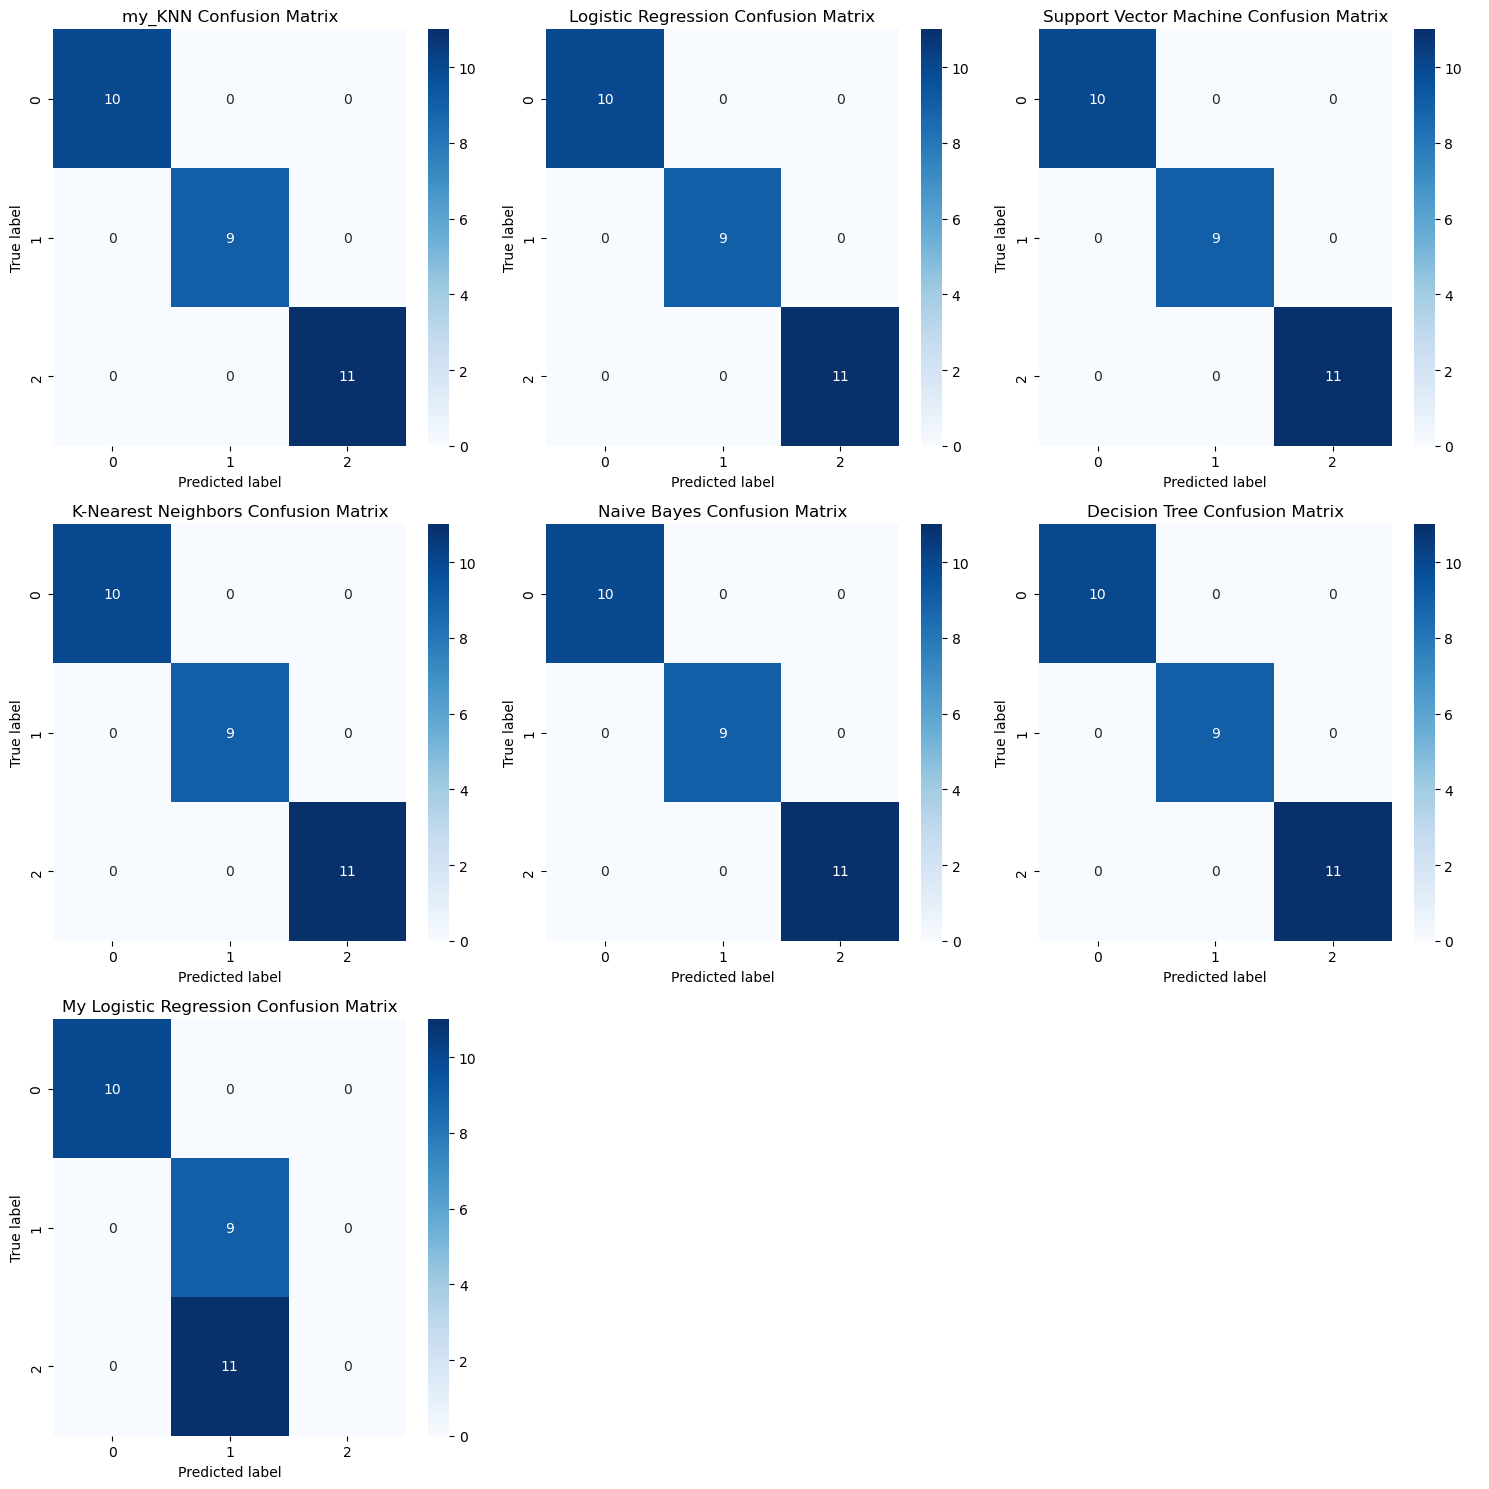

In [133]:
my_logistic_iris = MyLogisticRegression(learning_rate=0.01, iterations=1000)

my_logistic_iris.fit(X_train_scaled_iris, y_train_iris)
predictions_iris["My Logistic Regression"] = my_logistic_iris.predict(X_test_scaled_iris)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions_iris.items()):
    cm = confusion_matrix(y_test_iris, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

for i in range(len(predictions_iris), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Набор данных о качестве вина**
Наборы данных, связанные с образцами красного и белого вина ***Vinho Verde*** с севера Португалии. Цель состоит в том, чтобы смоделировать качество вина на основе физико-химических испытаний

In [137]:
data_wine = pd.read_csv('winequalityN.csv')

wine_info = data_wine.info()
wine_head = data_wine.head()

wine_info, wine_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(None,
     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0  white            7.0              0.27         0.36            20.7   
 1  white            6.3              0.30         0.34             1.6   
 2  white            8.1              0.28         0.40             6.9   
 3  white            7.2              0.23         0.32             8.5   
 4  white            7.2              0.23         0.32             8.5   
 
    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
 0      0.045                 45.0                 170.0   1.0010  3.00   
 1      0.049                 14.0                 132.0   0.9940  3.30   
 2      0.050                 30.0                  97.0   0.9951  3.26   
 3      0.058                 47.0                 186.0   0.9956  3.19   
 4      0.058                 47.0                 186.0   0.9956  3.19   
 
    sulphates  alcohol  quality  
 0       0.45      8.8        6  
 1       0.49      9.

Некоторые столбцы имеют пропущенные значения, например, ***fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH,*** и ***sulphates***. 
Следующий шаг — проведем чистку данных, заполнив или удалив пропущенные значения.

In [141]:
missing_values = data_wine.isnull().sum()

missing_values[missing_values > 0]

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

In [147]:
data_wine.fillna(data_wine.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

missing_values_after_cleaning = data_wine.isnull().sum()
missing_values_after_cleaning


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

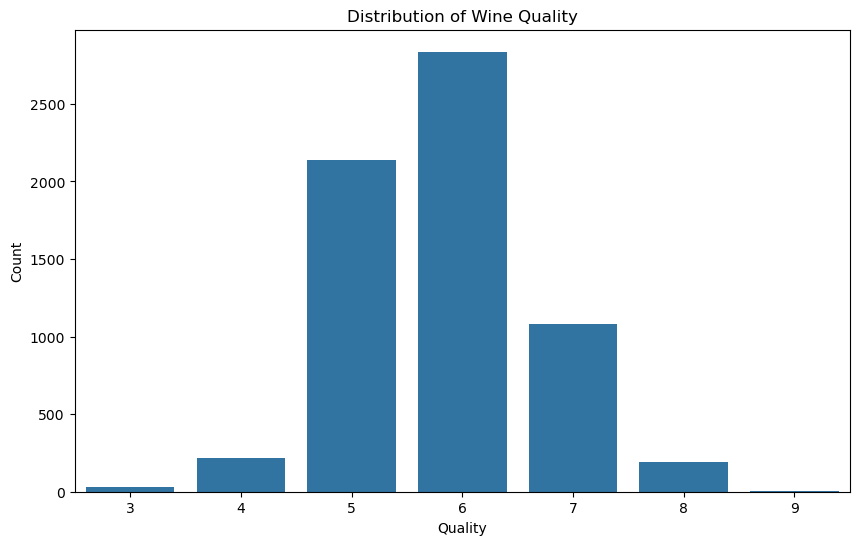

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data_wine)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

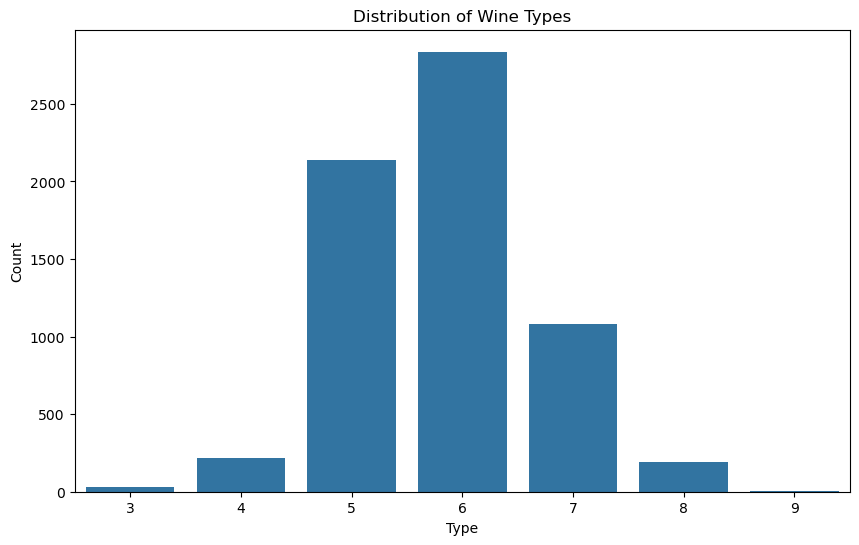

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data_wine)
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

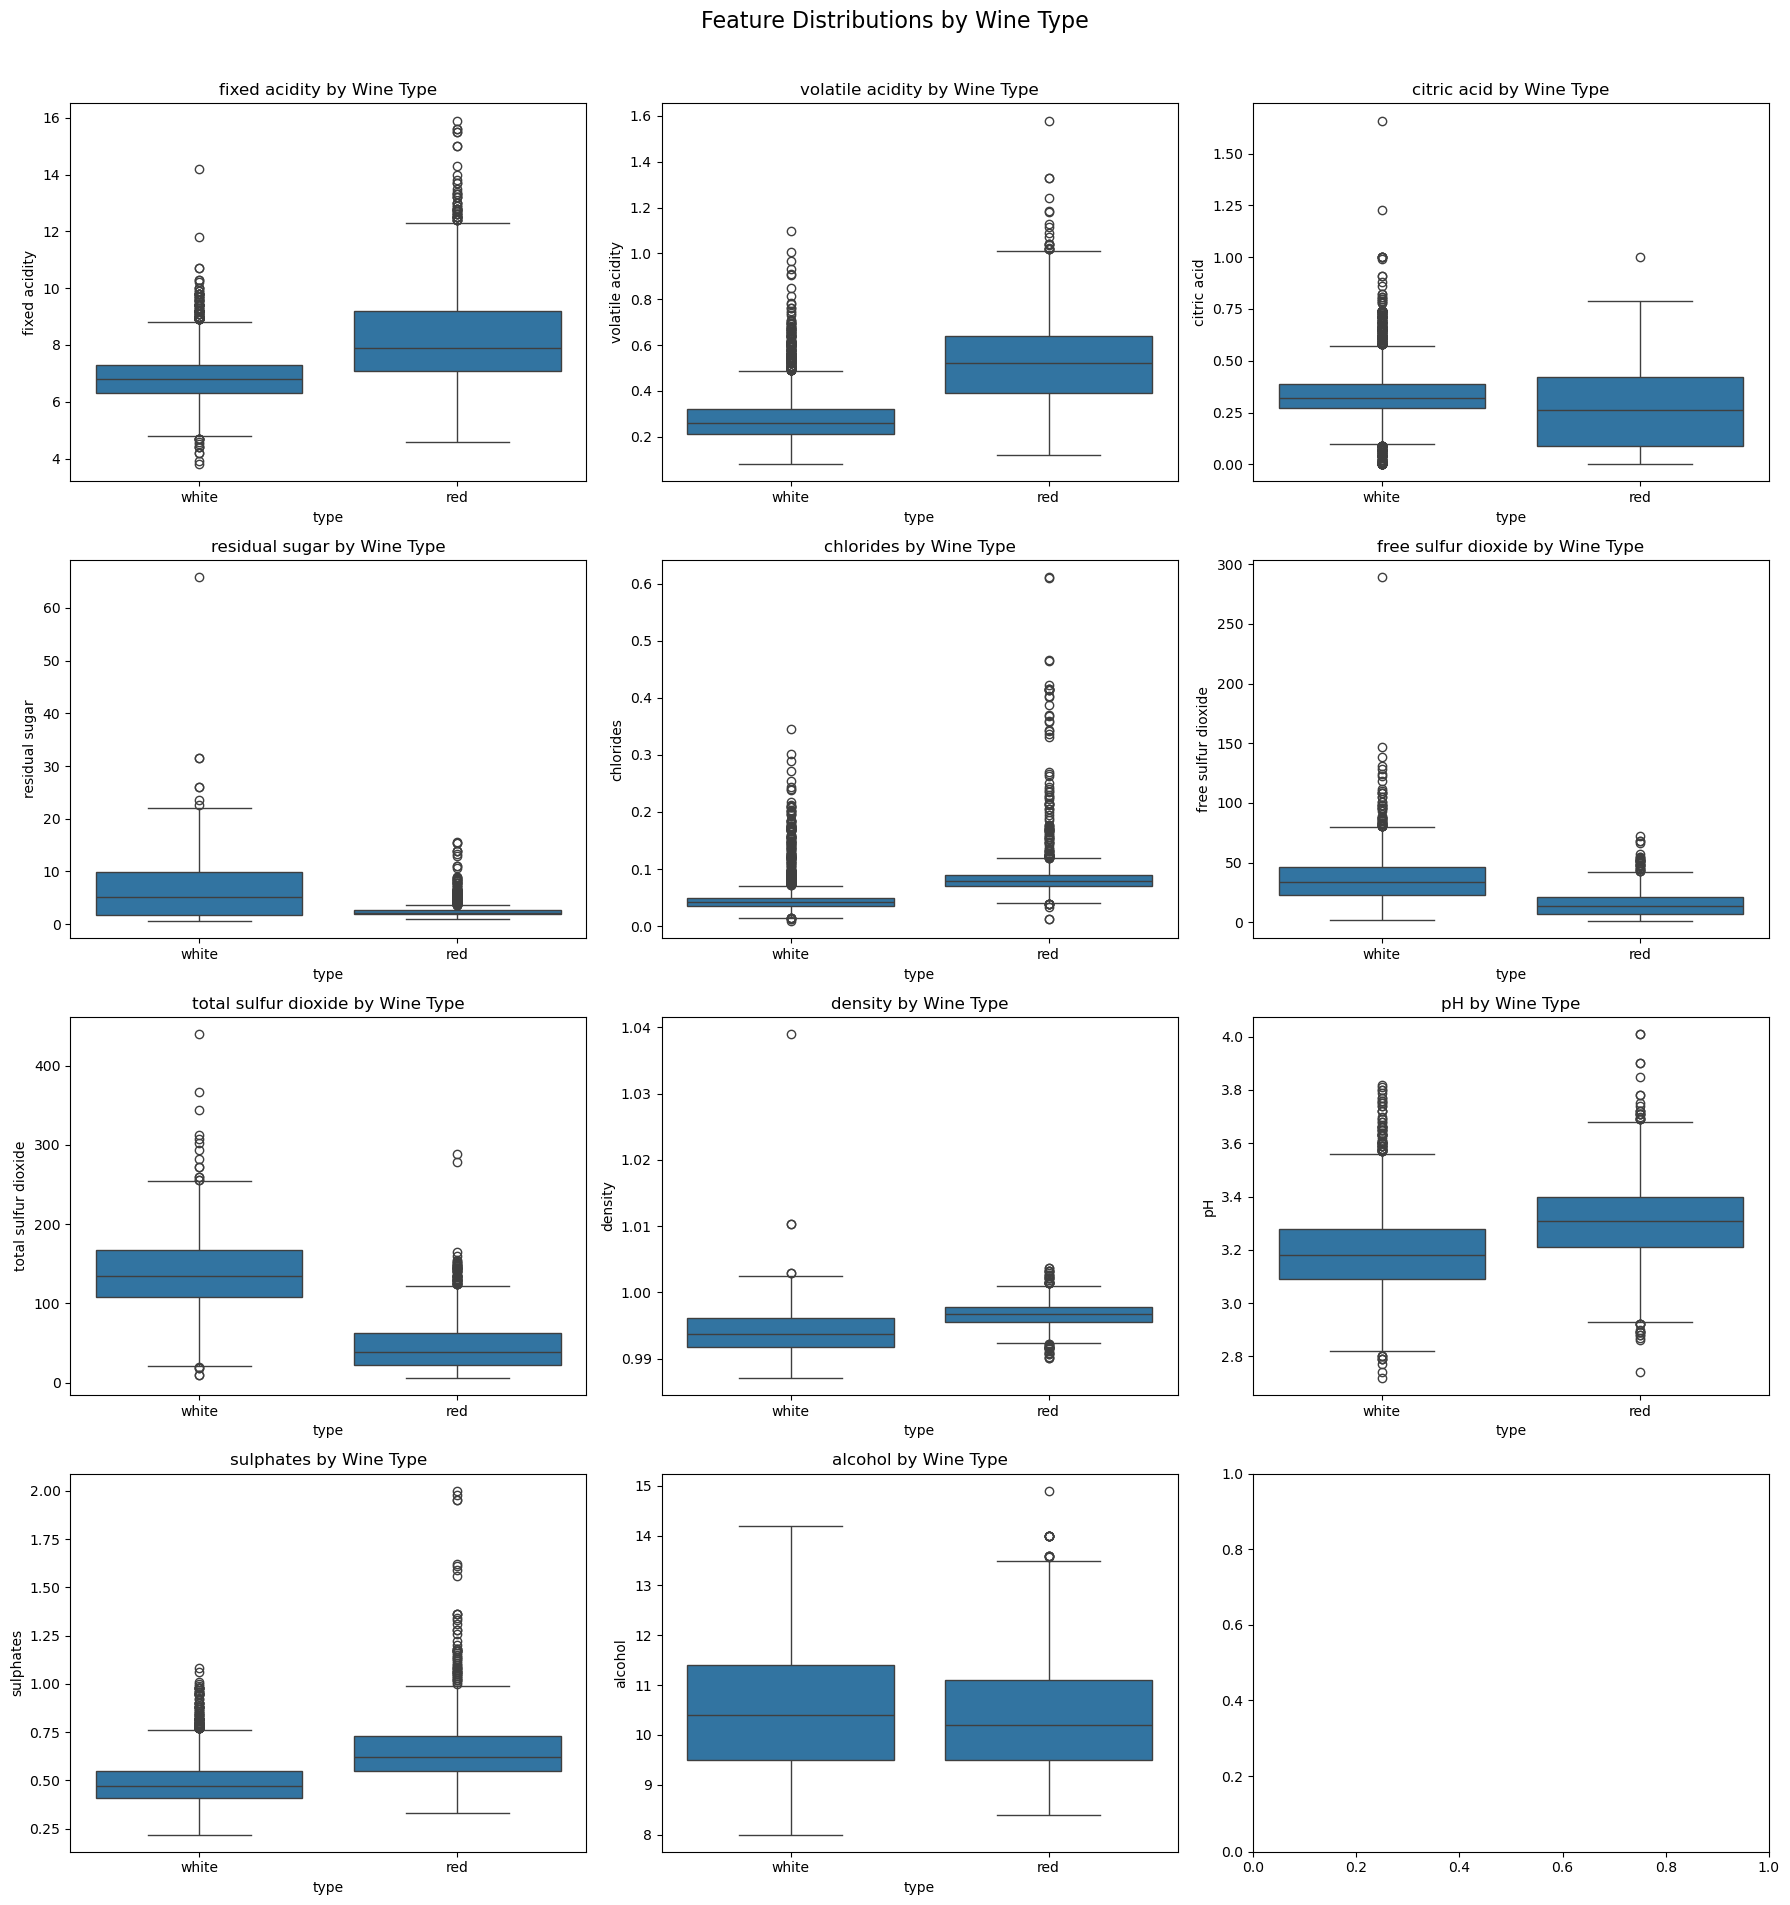

In [159]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Feature Distributions by Wine Type', fontsize=16)

features = data_wine.columns[1:-1]

for idx, feature in enumerate(features):
    sns.boxplot(x='type', y=feature, data=data_wine, ax=axes[idx // 3][idx % 3])
    axes[idx // 3][idx % 3].set_title(f'{feature} by Wine Type')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

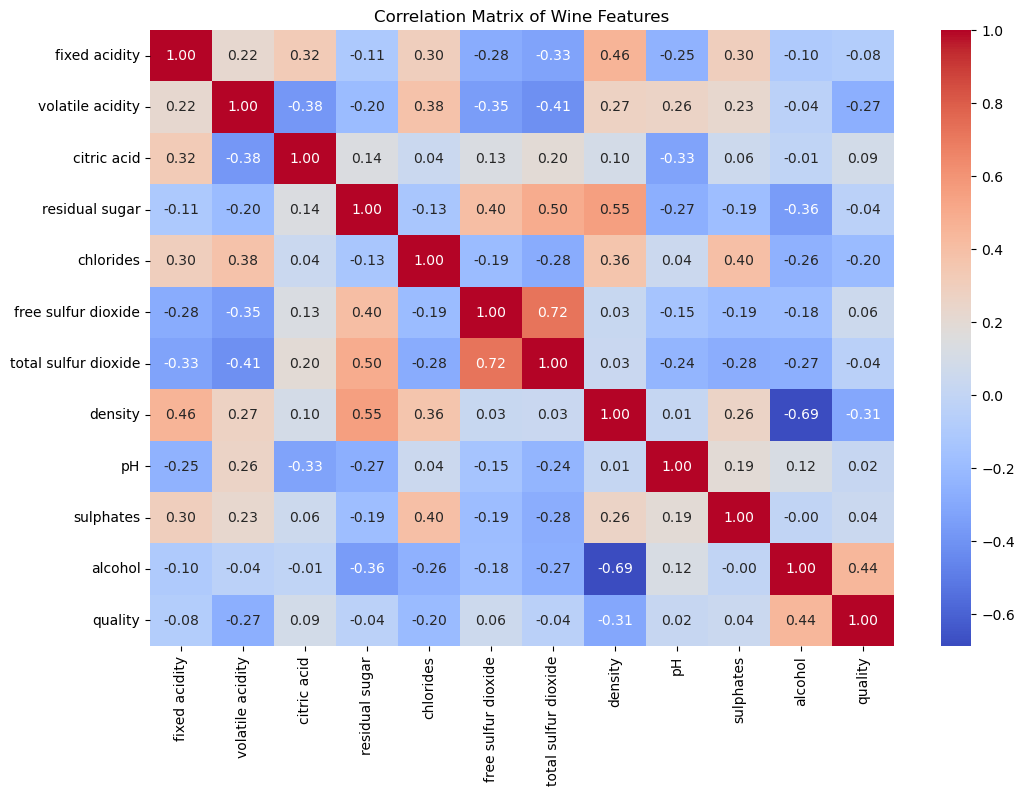

In [163]:
correlation_matrix_wine = data_wine.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_wine, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [165]:
data_wine_transformed = pd.get_dummies(data_wine, columns=['type'], drop_first=True)

data_wine_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True


Столбец ***type*** был успешно преобразован в числовой формат, где ***type_white*** указывает на белое вино (1 для белого и 0 для красного вина).

In [172]:
data_wine_sampled = data_wine_transformed.sample(n=2000, random_state=42)

param_grid_knn_wine_reduced = {
    'k': [3, 5],
    'distance_metric': ['euclidean', 'manhattan']
}
X_wine_sampled = data_wine_sampled.drop(columns=['quality']).values
y_wine_sampled = data_wine_sampled['quality'].values

X_train_wine_sampled, X_test_wine_sampled, y_train_wine_sampled, y_test_wine_sampled = train_test_split(X_wine_sampled, y_wine_sampled, test_size=0.2, random_state=42)

scaler_wine_sampled = StandardScaler()
X_train_scaled_wine_sampled = scaler_wine_sampled.fit_transform(X_train_wine_sampled)
X_test_scaled_wine_sampled = scaler_wine_sampled.transform(X_test_wine_sampled)

best_score_wine_sampled, best_params_wine_sampled = tune_knn(X_train_scaled_wine_sampled, y_train_wine_sampled, X_test_scaled_wine_sampled, y_test_wine_sampled, param_grid_knn_wine_reduced)
best_score_wine_sampled, best_params_wine_sampled

(0.53, {'k': 5, 'distance_metric': 'euclidean'})

In [174]:
models_wine_sampled = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

cv_scores_wine_sampled = {}

for model_name, model in models_wine_sampled.items():
    scores = cross_val_score(model, X_train_scaled_wine_sampled, y_train_wine_sampled, cv=5, scoring='accuracy')
    cv_scores_wine_sampled[model_name] = scores.mean()

cv_scores_wine_sampled

{'Logistic Regression': 0.548125,
 'Support Vector Machine': 0.553125,
 'K-Nearest Neighbors': 0.510625,
 'Naive Bayes': 0.39,
 'Decision Tree': 0.48250000000000004}

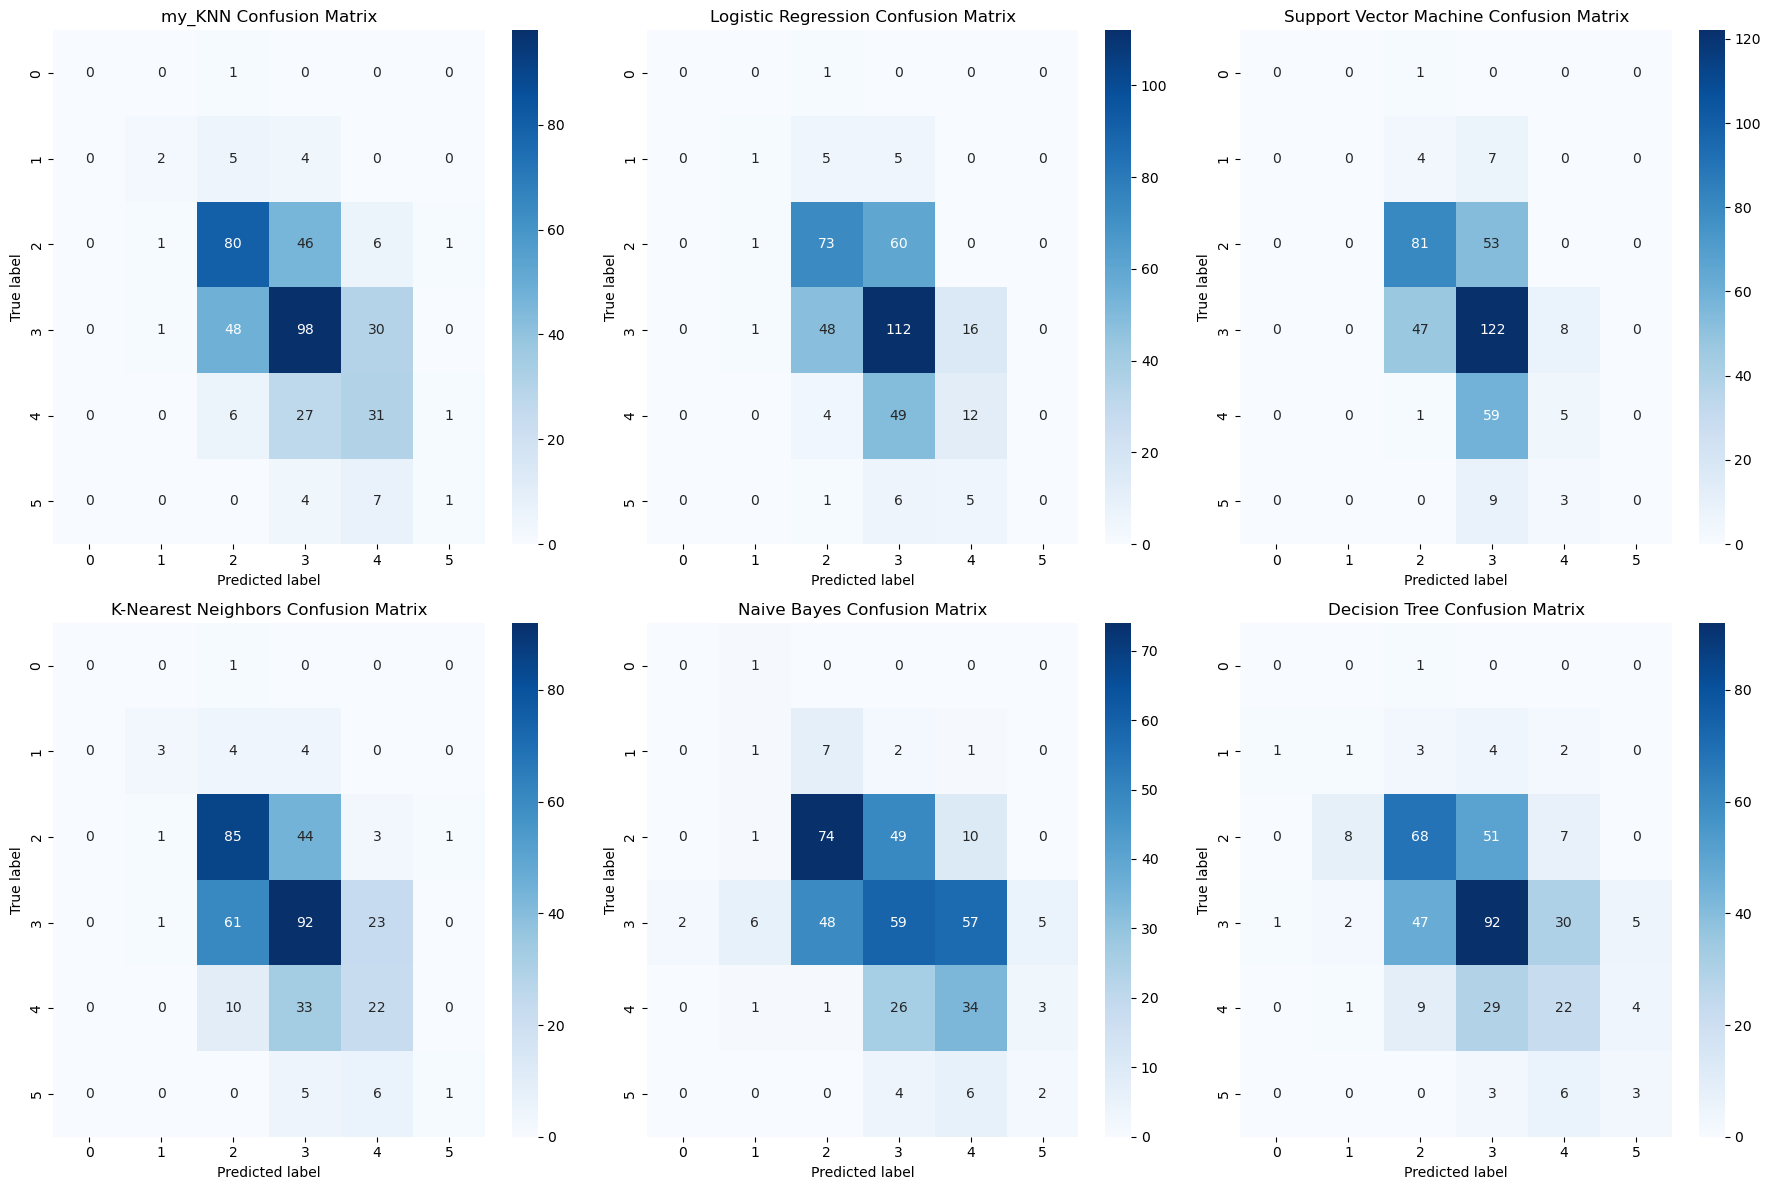

In [176]:
fitted_models_wine_sampled = {
    "my_KNN": my_KNN(k=5, distance_metric='euclidean'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

predictions_wine_sampled = {}

for model_name, model in fitted_models_wine_sampled.items():
    model.fit(X_train_scaled_wine_sampled, y_train_wine_sampled)
    predictions_wine_sampled[model_name] = model.predict(X_test_scaled_wine_sampled) if model_name != "my_KNN" else model.predict(X_test_scaled_wine_sampled)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions_wine_sampled.items()):
    cm = confusion_matrix(y_test_wine_sampled, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

plt.tight_layout()
plt.show()


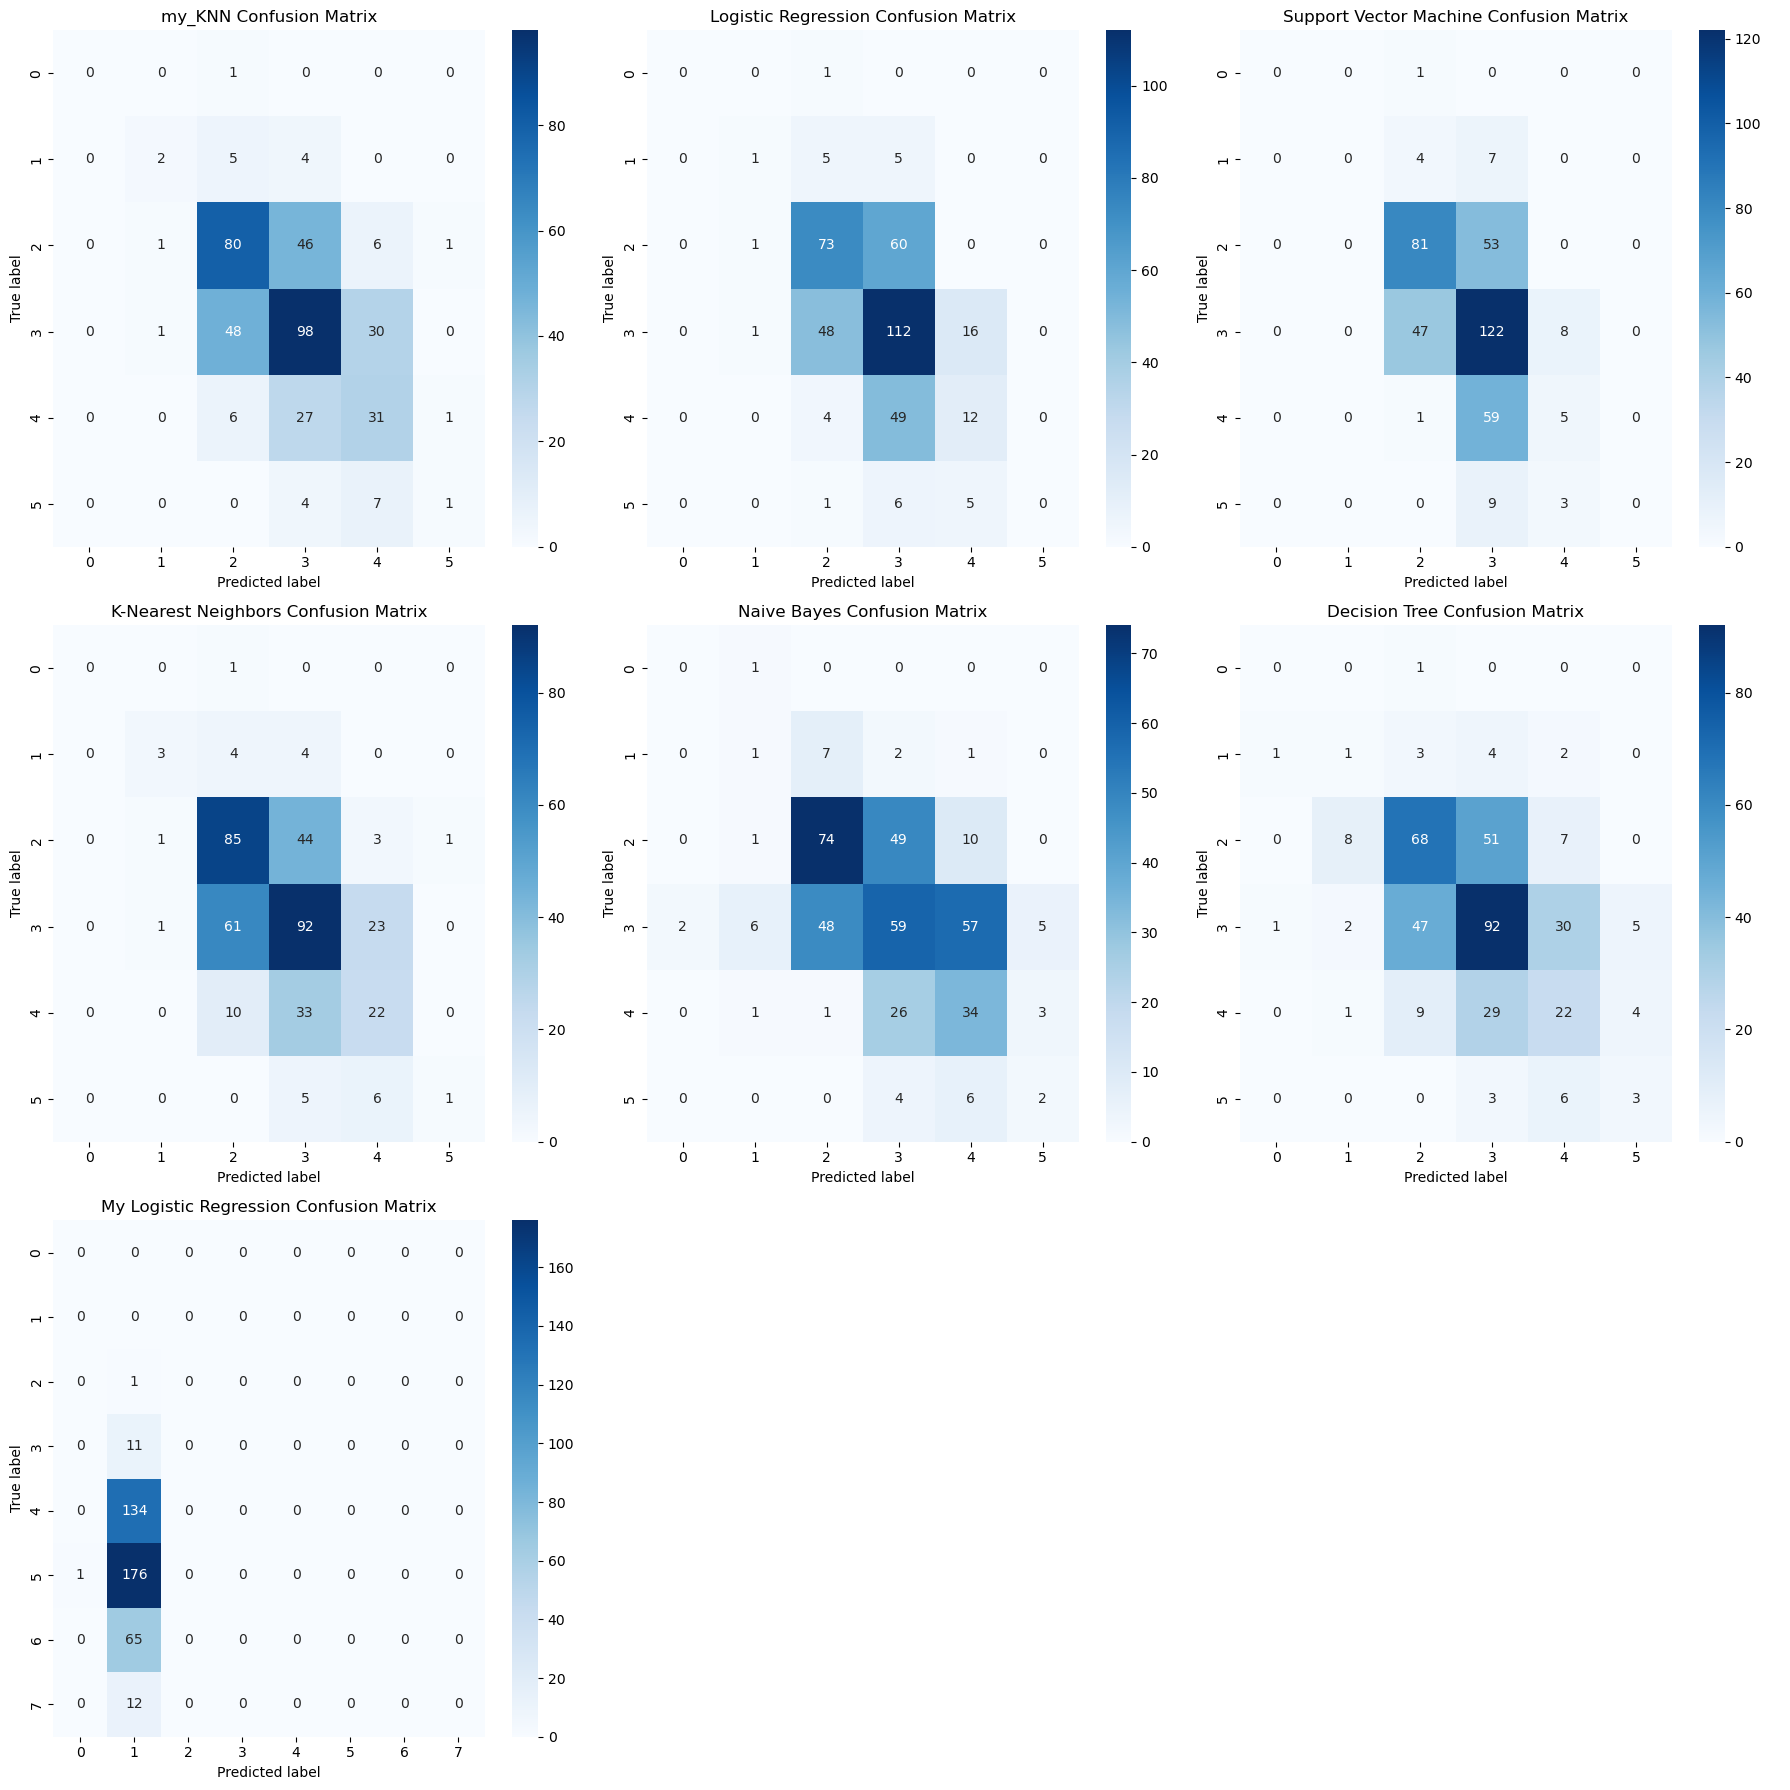

In [178]:
my_logistic_wine_sampled = MyLogisticRegression(learning_rate=0.01, iterations=1000)
my_logistic_wine_sampled.fit(X_train_scaled_wine_sampled, y_train_wine_sampled)

predictions_wine_sampled["My Logistic Regression"] = my_logistic_wine_sampled.predict(X_test_scaled_wine_sampled)

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()

for idx, (model_name, preds) in enumerate(predictions_wine_sampled.items()):
    cm = confusion_matrix(y_test_wine_sampled, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted label")
    axes[idx].set_ylabel("True label")

for i in range(len(predictions_wine_sampled), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()